# Match stars in the Tycho-2 - Gaia catalog (TGAS)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import gaussian_kde
import sys
sys.path.append('../src')
import P_posterior
import P_random
import parallax
import const as c

%matplotlib inline

In [2]:
# Read in sample from TGAS table
dtype = [('ID','<i8'),('tyc','S11'),('hip','<i8'),('ra','<f8'),('dec','<f8'),('mu_ra','<f8'),('mu_dec','<f8'), \
     ('mu_ra_err','<f8'),('mu_dec_err','<f8'),('plx','<f8'),('plx_err','<f8')]

tgas_full = np.array([], dtype=dtype)

for i in np.arange(16):
    if i < 10:
        filename = ('../data/TGAS/TgasSource_000-000-00' + str(i) + '.csv')
    else:
        filename = ('../data/TGAS/TgasSource_000-000-0' + str(i) + '.csv')

    print filename
    tgas_tmp = Table.read(filename, format='csv', guess=True)
    
    

    tgas = np.zeros(len(tgas_tmp), dtype=dtype)

    tgas['ID'] = tgas_tmp['source_id']
    tgas['tyc'] = tgas_tmp['tycho2_id']
    tgas['hip'] = tgas_tmp['hip']
    tgas['ra'] = tgas_tmp['ra']
    tgas['dec'] = tgas_tmp['dec']
    tgas['mu_ra'] = tgas_tmp['pmra']
    tgas['mu_ra_err'] = tgas_tmp['pmra_error']
    tgas['mu_dec'] = tgas_tmp['pmdec']
    tgas['mu_dec_err'] = tgas_tmp['pmdec_error']
    tgas['plx'] = tgas_tmp['parallax']
    tgas['plx_err'] = tgas_tmp['parallax_error']

    tgas_full = np.append(tgas_full, tgas)


../data/TGAS/TgasSource_000-000-000.csv
../data/TGAS/TgasSource_000-000-001.csv
../data/TGAS/TgasSource_000-000-002.csv
../data/TGAS/TgasSource_000-000-003.csv
../data/TGAS/TgasSource_000-000-004.csv
../data/TGAS/TgasSource_000-000-005.csv
../data/TGAS/TgasSource_000-000-006.csv
../data/TGAS/TgasSource_000-000-007.csv
../data/TGAS/TgasSource_000-000-008.csv
../data/TGAS/TgasSource_000-000-009.csv
../data/TGAS/TgasSource_000-000-010.csv
../data/TGAS/TgasSource_000-000-011.csv
../data/TGAS/TgasSource_000-000-012.csv
../data/TGAS/TgasSource_000-000-013.csv
../data/TGAS/TgasSource_000-000-014.csv
../data/TGAS/TgasSource_000-000-015.csv


In [3]:
P_posterior.match_binaries(tgas_full, subsample=1000)

Generating binaries...
We are testing 2057050 stars...
0 0.44843506813
6 8 16733192740608 26834955821312 529.109158988 24.5272373779 -3.35035516625 26.3080093459 9.19540541533 5.69820458536 0.263677270261 6.20249216692 0.247252651832 [  7.78546163e-11] 7.69001891434e-10 [ 0.83161311]


KeyboardInterrupt: 

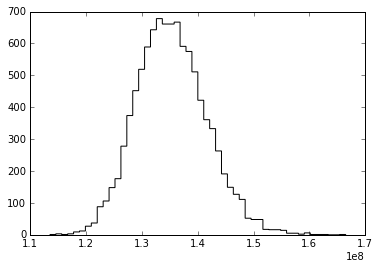

In [42]:
ra_1, dec_1 = 45.152, 0.189
ra_2, dec_2 = 45.010, 0.243
mu_ra_1, mu_ra_err_1, mu_dec_1, mu_dec_err_1 = 24.527, 1.177, -3.350, 0.707
mu_ra_2, mu_ra_err_2, mu_dec_2, mu_dec_err_2 = 26.308, 2.034, 9.195, 1.028
plx_1, plx_err_1 = 5.698, 0.263
plx_2, plx_err_2 = 6.202, 0.247


# Theta
theta = P_random.get_theta_proj_degree(ra_1, dec_1, ra_2, dec_2)



# Proper motion
delta_mu_ra_err = np.sqrt(mu_ra_err_1**2 + mu_ra_err_2**2)
delta_mu_dec_err = np.sqrt(mu_dec_err_1**2 + mu_dec_err_2**2)

delta_mu_ra_sample = np.random.normal(loc=(mu_ra_1-mu_ra_2), scale=delta_mu_ra_err, size=10000)
delta_mu_dec_sample = np.random.normal(loc=(mu_dec_1-mu_dec_2), scale=delta_mu_dec_err, size=10000)

delta_mu_sample = np.sqrt(delta_mu_ra_sample**2 + delta_mu_dec_sample**2)

#plt.hist(delta_mu_sample, histtype='step', color='k', bins=30)





# Parallax
plx_sample_1 = np.random.normal(loc=plx_1, scale=plx_err_1, size=10000)
plx_sample_2 = np.random.normal(loc=plx_2, scale=plx_err_2, size=10000)

#plt.hist(plx_sample_1, histtype='step', color='r', bins=50, range=(4.0, 8.0))
#plt.hist(plx_sample_2, histtype='step', color='b', bins=50, range=(4.0, 8.0))
#plt.hist(1.0e3/plx_sample_1, histtype='step', color='r', bins=50)
#plt.hist(1.0e3/plx_sample_2, histtype='step', color='b', bins=50)


# Deprojected quantities
dist_sample = 1.0e3 / plx_sample_1
delta_v_trans = (delta_mu_sample/1.0e3/3600.0*np.pi/180.0) * dist_sample * (c.pc_to_cm/1.0e5) / (c.yr_to_sec)
proj_sep = (theta*np.pi/180.0) * dist_sample * (c.pc_to_cm / c.Rsun_to_cm)

#plt.hist(delta_v_trans, histtype='step', color='r', bins=50)
#plt.hist(proj_sep/215., histtype='step', color='r', bins=50)



# Jacobians
jacob_dV_dmu = (1.0e3/plx_sample_1) * (c.pc_to_cm/1.0e5) * (1.0 / ((180.0/np.pi)*3600.0*1.0e3)) * (1.0 / c.yr_to_sec)
jacob_ds_dtheta = (1.0e3/plx_sample_1) * (np.pi/180.0) * (c.pc_to_cm / c.Rsun_to_cm)
#plt.hist(jacob_dV_dmu, histtype='step', color='k', bins=50)
plt.hist(jacob_ds_dtheta, histtype='step', color='k', bins=50)



plt.show()

In [69]:
P_binary.generate_binary_set(num_sys=100000)

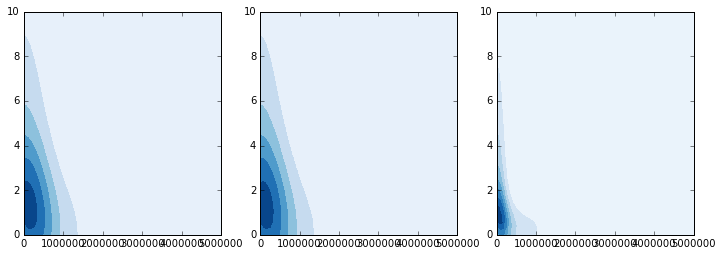

In [72]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))


nbins = 100
xmin, xmax = 0.0, 5.0e6
ymin, ymax = 0.0, 10.0



proj_sep_test = np.linspace(xmin, xmax, nbins)
delta_v_trans_test = np.linspace(ymin, ymax, nbins)
X, Y = np.meshgrid(proj_sep_test, delta_v_trans_test)




# Binary probability plot - Scott (default)
Z = P_binary.get_P_binary(X.flatten(), Y.flatten())
ax[0].tricontourf(X.flatten(), Y.flatten(), Z, cmap='Blues', extend='max')




# Binary probability plot - Silverman
P_binary.binary_kde.set_bandwidth(bw_method='silverman')
Z = P_binary.get_P_binary(X.flatten(), Y.flatten())
ax[1].tricontourf(X.flatten(), Y.flatten(), Z, cmap='Blues', extend='max')




# Binary probability plot - Const
P_binary.binary_kde.set_bandwidth(bw_method=P_binary.binary_kde.factor / 3.)
Z = P_binary.get_P_binary(X.flatten(), Y.flatten())
ax[2].tricontourf(X.flatten(), Y.flatten(), Z, cmap='Blues', extend='max')



plt.show()

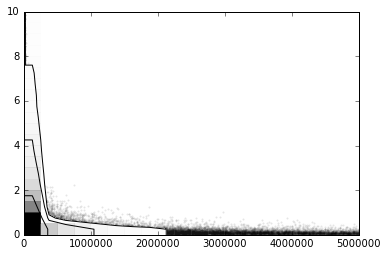

In [71]:
range=[(0.0, 5.0e6),(0.0, 10.0)]
corner.hist2d(P_binary.binary_set['proj_sep'], P_binary.binary_set['delta_v_trans'], range=range)

plt.show()

In [66]:
corner.hist2d?